In [3]:
# Code Block 1: Memuat dataset MNIST dan melakukan preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Memuat dataset mnist_784
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)
# print(mnist)
# print("x: ",X)
# print("y: ", y)

# df = pd.DataFrame(X)
# df['label'] = y
# print(df.head())
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode label
encoder = OneHotEncoder(sparse=False, categories='auto')
y_onehot = encoder.fit_transform(y.to_numpy().reshape(-1, 1))


# Membagi data menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print("Dataset MNIST telah dimuat.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train_head:\n", X_train[:5])
print("y_train_head:\n", y_train[:5])
print("X_val_head:\n", X_val[:5])
print("y_val_head:\n", y_val[:5])

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


Dataset MNIST telah dimuat.
X_train shape: (56000, 784)
y_train shape: (56000, 10)
X_train_head:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train_head:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
X_val_head:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_val_head:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
X_val shape: (14000, 784)
y_val shape: (14000, 10)


Pengaruh Variasi Width (Lebar Hidden Layer)
Depth (jumlah hidden layer) tetap, width bervariasi

Melatih model dengan hidden layer width: 64
Model dengan width 64 memperoleh akurasi: 0.9077
Melatih model dengan hidden layer width: 128
Model dengan width 128 memperoleh akurasi: 0.9128
Melatih model dengan hidden layer width: 256
Model dengan width 256 memperoleh akurasi: 0.9154


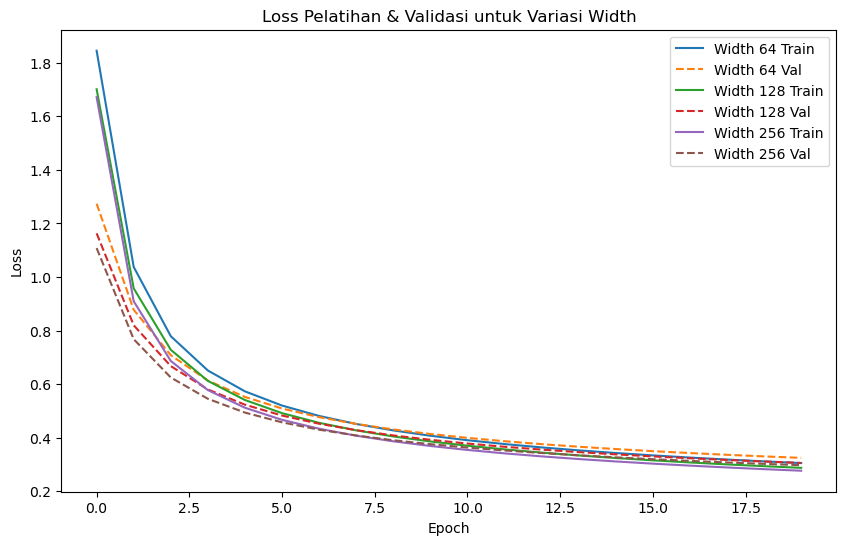

In [4]:
# Code Block 2: Uji pengaruh variasi width (lebar hidden layer) dengan depth tetap
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import relu, softmax
from initialization import init_weights_uniform, init_weights_he
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss

# Variasi lebar hidden layer yang akan diuji
widths = [64, 128, 256]  # tiga variasi width
depth = 1                # depth tetap (satu hidden layer)
input_dim = 784
output_dim = 10
epochs = 20
batch_size = 32
learning_rate = 0.01

results_width = {}

for width in widths:
    print(f"Melatih model dengan hidden layer width: {width}")
    layers = [input_dim, width, output_dim]
    # Gunakan fungsi aktivasi ReLU untuk hidden layer dan softmax untuk output
    activations = [relu, softmax]
    
    # Inisialisasi bobot dengan distribusi uniform
    init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}
    
    model = FFNN(layers=layers,
                 activations=activations,
                 loss_func=categorical_cross_entropy_loss,
                 loss_grad=d_categorical_cross_entropy_loss,
                 init_method=init_weights_he,
                 init_params=init_params)
    
    history = model.train(X_train, y_train, X_val, y_val, 
                          batch_size=batch_size, epochs=epochs, 
                          learning_rate=learning_rate, verbose=0)
    
    # Evaluasi prediksi pada data validasi
    y_pred = model.forward(X_val)
    final_pred = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(final_pred == true_labels)
    
    results_width[width] = {'accuracy': accuracy, 'history': history}
    print(f"Model dengan width {width} memperoleh akurasi: {accuracy:.4f}")

# Plot grafik loss pelatihan dan validasi untuk masing–masing konfigurasi width
plt.figure(figsize=(10, 6))
for width in widths:
    plt.plot(results_width[width]['history']['train_loss'], label=f'Width {width} Train')
    plt.plot(results_width[width]['history']['val_loss'], label=f'Width {width} Val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Pelatihan & Validasi untuk Variasi Width')
plt.legend()
plt.show()


Pengaruh Variasi Depth (Jumlah Hidden Layer)
Width (lebar tiap layer) tetap, depth bervariasi

Melatih model dengan 1 hidden layer
Model dengan 1 hidden layer memperoleh akurasi: 0.9077
Melatih model dengan 2 hidden layer
Model dengan 2 hidden layer memperoleh akurasi: 0.9129
Melatih model dengan 3 hidden layer
Model dengan 3 hidden layer memperoleh akurasi: 0.9136


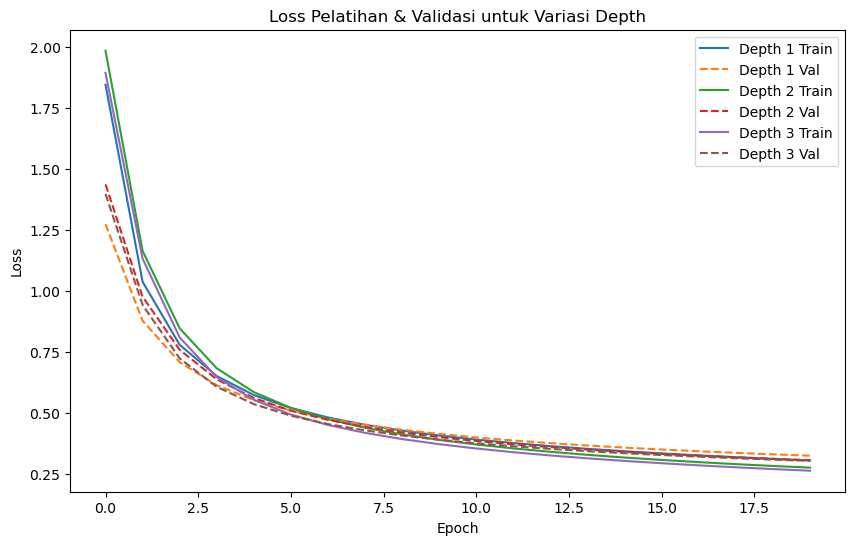

In [16]:
# Code Block 3: Uji pengaruh variasi depth (jumlah hidden layer) dengan width tetap
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import relu, softmax
from initialization import init_weights_he
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss

depths = [1, 2, 3]
width_fixed = 64
input_dim = 784
output_dim = 10
epochs = 20
batch_size = 32
learning_rate = 0.01

results_depth = {}

for d in depths:
    print(f"Melatih model dengan {d} hidden layer")
    # Membentuk list layers: input, d hidden layers dengan width tetap, dan output
    layers = [input_dim] + [width_fixed] * d + [output_dim]
    # Gunakan ReLU untuk setiap hidden layer dan softmax untuk output
    # Tentukan aktivasi berdasarkan jumlah layer (d)
    if d == 1:
        activations = [relu, softmax]
    elif d == 2:
        activations = [relu, relu, softmax]
    elif d == 3:
        activations = [relu, relu, relu, softmax]  

    
    init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}
    
    model = FFNN(layers=layers,
                 activations=activations,
                 loss_func=categorical_cross_entropy_loss,
                 loss_grad=d_categorical_cross_entropy_loss,
                 init_method=init_weights_he,
                 init_params=init_params)
    
    history = model.train(X_train, y_train, X_val, y_val, 
                          batch_size=batch_size, epochs=epochs, 
                          learning_rate=learning_rate, verbose=0)
    
    y_pred = model.forward(X_val)
    final_pred = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(final_pred == true_labels)
    
    results_depth[d] = {'accuracy': accuracy, 'history': history}
    print(f"Model dengan {d} hidden layer memperoleh akurasi: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
for d in depths:
    plt.plot(results_depth[d]['history']['train_loss'], label=f'Depth {d} Train')
    plt.plot(results_depth[d]['history']['val_loss'], label=f'Depth {d} Val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Pelatihan & Validasi untuk Variasi Depth')
plt.legend()
plt.show()


Pengaruh Fungsi Aktivasi Hidden Layer
Uji untuk setiap fungsi aktivasi (kecuali softmax) pada hidden layer

Melatih model dengan fungsi aktivasi hidden: linear
Model dengan aktivasi linear memperoleh akurasi: 0.9036


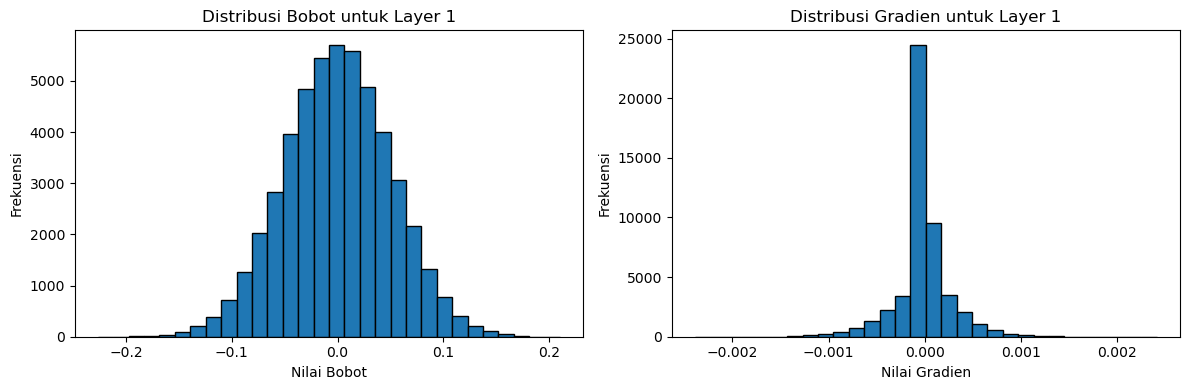

<Figure size 640x480 with 0 Axes>

Melatih model dengan fungsi aktivasi hidden: relu
Model dengan aktivasi relu memperoleh akurasi: 0.9077


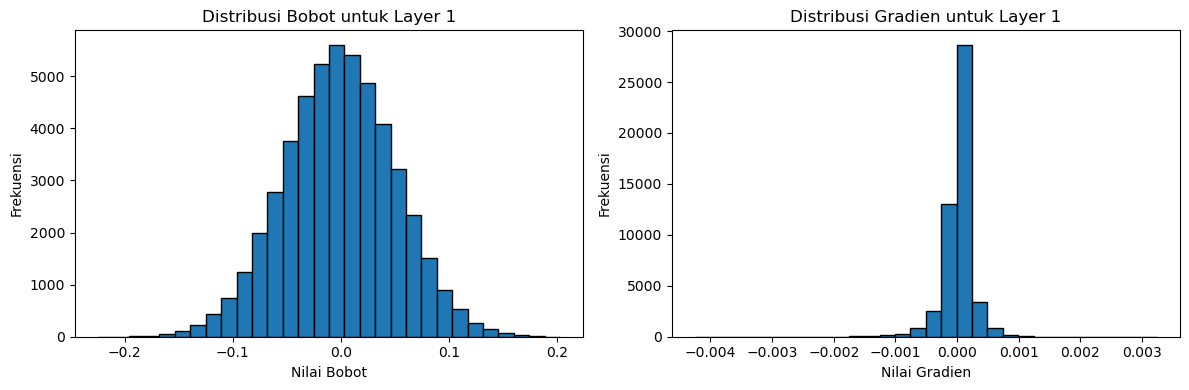

<Figure size 640x480 with 0 Axes>

Melatih model dengan fungsi aktivasi hidden: sigmoid
Model dengan aktivasi sigmoid memperoleh akurasi: 0.8558


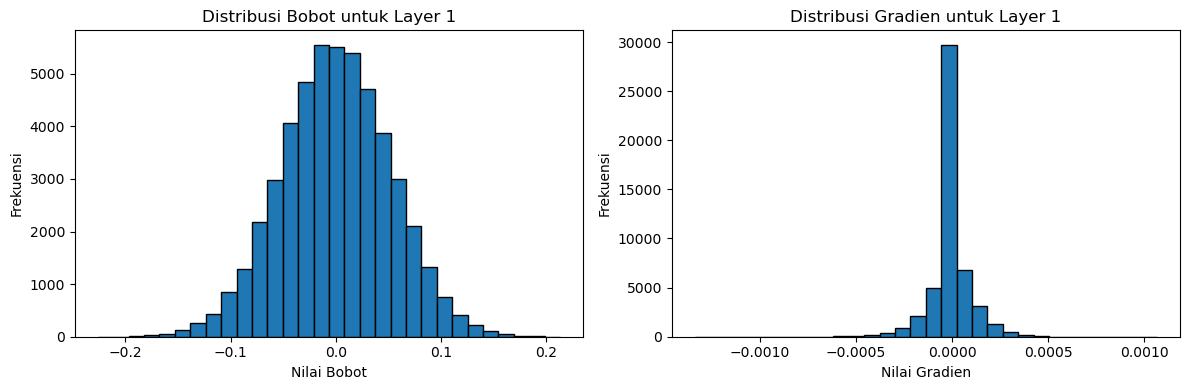

<Figure size 640x480 with 0 Axes>

Melatih model dengan fungsi aktivasi hidden: tanh
Model dengan aktivasi tanh memperoleh akurasi: 0.8967


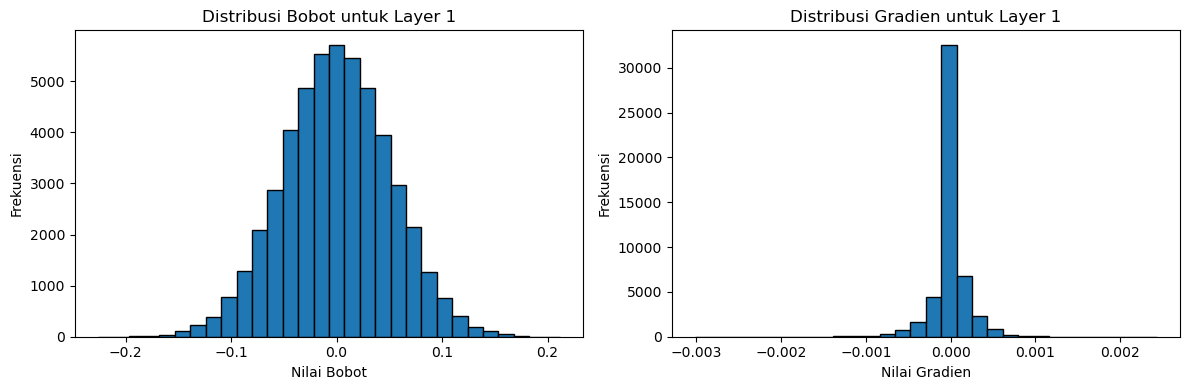

<Figure size 640x480 with 0 Axes>

Melatih model dengan fungsi aktivasi hidden: leaky_relu
Model dengan aktivasi leaky_relu memperoleh akurasi: 0.9075


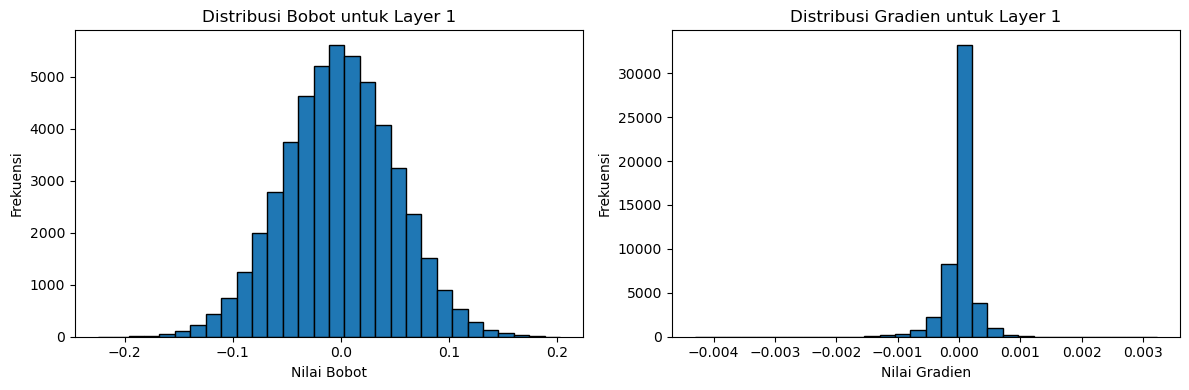

<Figure size 640x480 with 0 Axes>

Melatih model dengan fungsi aktivasi hidden: elu
Model dengan aktivasi elu memperoleh akurasi: 0.9058


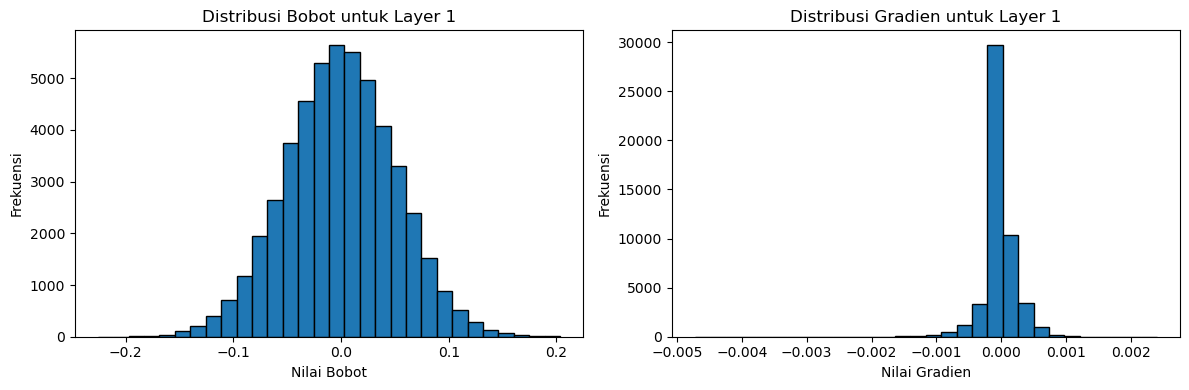

<Figure size 640x480 with 0 Axes>

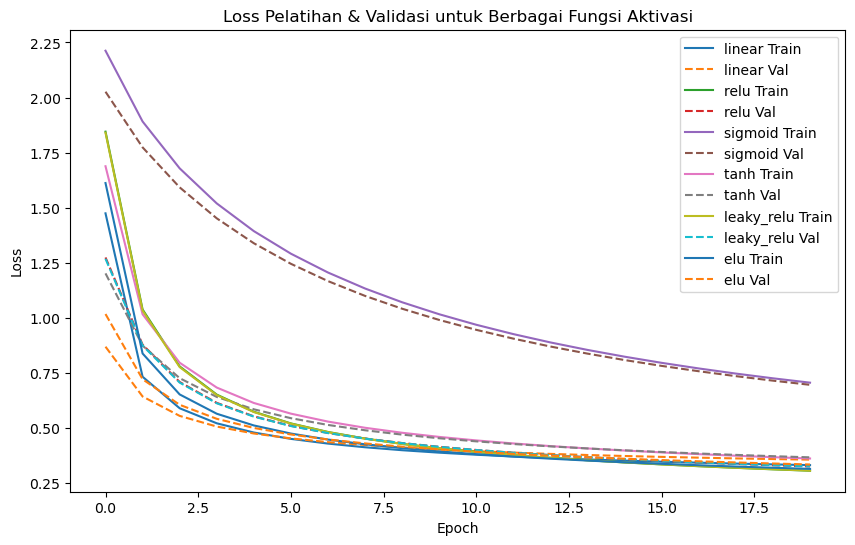

In [6]:
# Code Block 4: Uji pengaruh fungsi aktivasi hidden layer
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import linear, relu, sigmoid, tanh, leaky_relu, elu, softmax
from initialization import init_weights_uniform
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss

# Daftar fungsi aktivasi yang akan diuji untuk hidden layer
activations_to_test = {
    'linear': linear,
    'relu': relu,
    'sigmoid': sigmoid,
    'tanh': tanh,
    'leaky_relu': leaky_relu,
    'elu': elu
}

input_dim = 784
hidden_dim = 64
output_dim = 10
epochs = 20
batch_size = 32
learning_rate = 0.01

results_activation = {}

for name, act_func in activations_to_test.items():
    print(f"Melatih model dengan fungsi aktivasi hidden: {name}")
    layers = [input_dim, hidden_dim, output_dim]
    # Gunakan fungsi aktivasi uji untuk hidden layer dan softmax untuk output layer
    activations = [act_func, softmax]
    
    init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}
    
    model = FFNN(layers=layers,
                 activations=activations,
                 loss_func=categorical_cross_entropy_loss,
                 loss_grad=d_categorical_cross_entropy_loss,
                 init_method=init_weights_he,
                 init_params=init_params)
    
    history = model.train(X_train, y_train, X_val, y_val, 
                          batch_size=batch_size, epochs=epochs, 
                          learning_rate=learning_rate, verbose=0)
    
    y_pred = model.forward(X_val)
    final_pred = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(final_pred == true_labels)
    
    results_activation[name] = {'accuracy': accuracy, 'history': history}
    print(f"Model dengan aktivasi {name} memperoleh akurasi: {accuracy:.4f}")
    
    # Plot distribusi bobot dan gradien pada hidden layer (misal: layer 1)
    model.plot_weight_and_gradient_distribution([1])
    plt.suptitle(f"Distribusi Bobot dan Gradien (Aktivasi: {name})")
    plt.show()

# Plot grafik loss pelatihan & validasi untuk tiap fungsi aktivasi
plt.figure(figsize=(10, 6))
for name in activations_to_test.keys():
    plt.plot(results_activation[name]['history']['train_loss'], label=f'{name} Train')
    plt.plot(results_activation[name]['history']['val_loss'], label=f'{name} Val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Pelatihan & Validasi untuk Berbagai Fungsi Aktivasi')
plt.legend()
plt.show()


Pengaruh Variasi Learning Rate
Lakukan tiga variasi learning rate dan bandingkan hasilnya

Melatih model dengan learning rate: 0.001
Model dengan learning rate 0.001 memperoleh akurasi: 0.7607


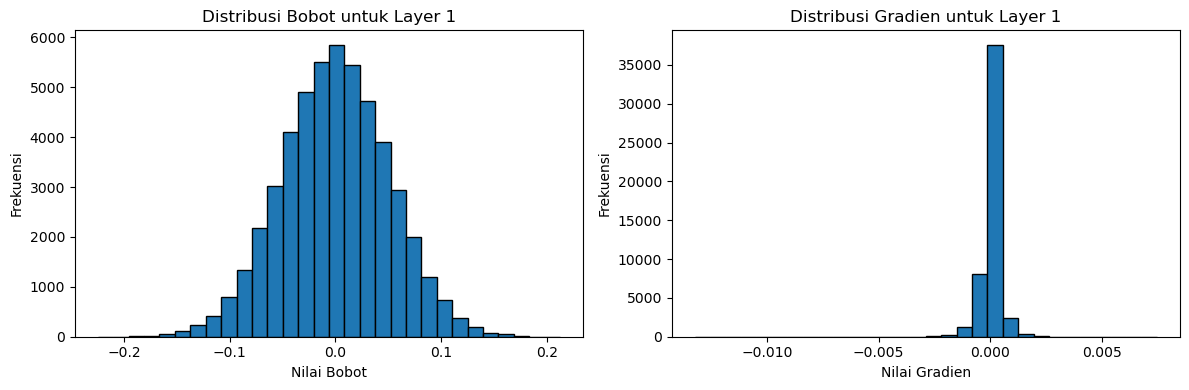

<Figure size 640x480 with 0 Axes>

Melatih model dengan learning rate: 0.01
Model dengan learning rate 0.01 memperoleh akurasi: 0.9077


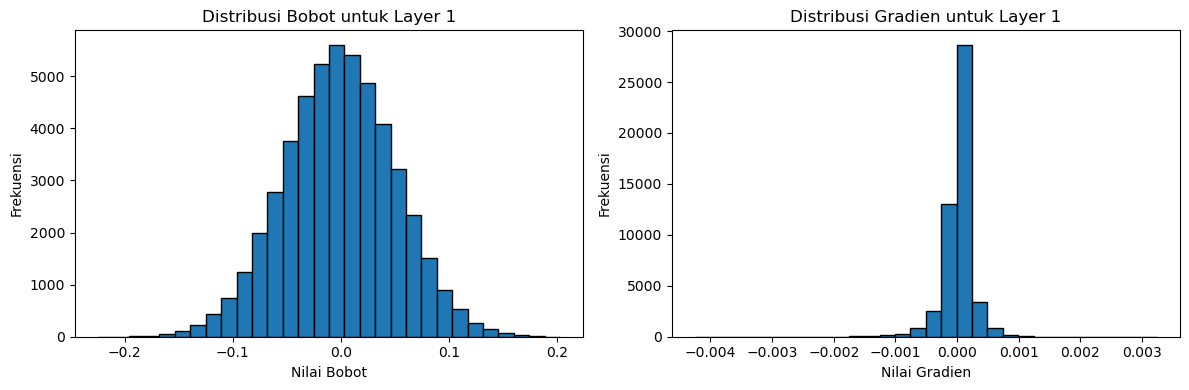

<Figure size 640x480 with 0 Axes>

Melatih model dengan learning rate: 0.1
Model dengan learning rate 0.1 memperoleh akurasi: 0.9530


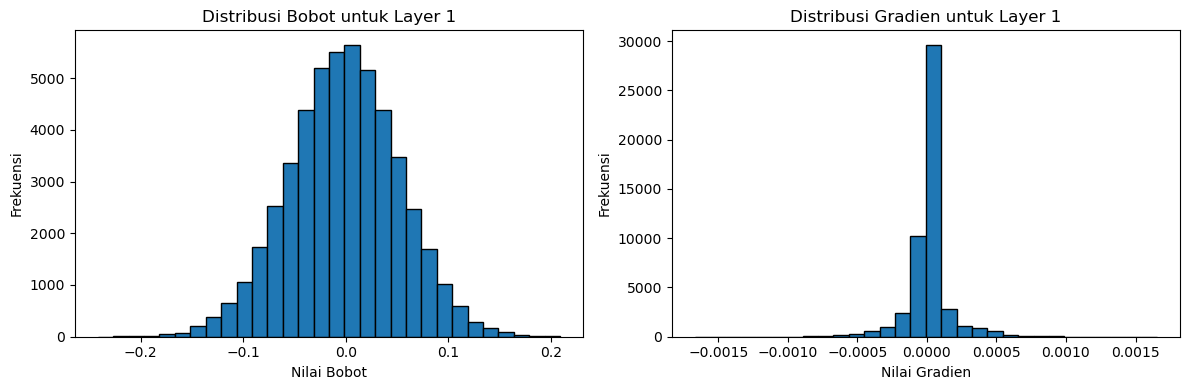

<Figure size 640x480 with 0 Axes>

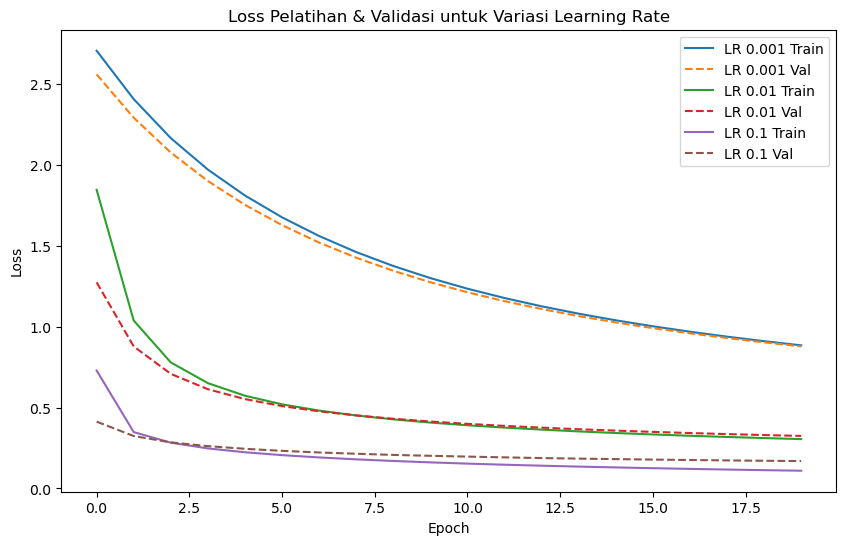

In [13]:
# Code Block 5: Uji pengaruh variasi learning rate
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import relu, softmax
from initialization import init_weights_he
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss

learning_rates = [0.001, 0.01, 0.1]
input_dim = 784
hidden_dim = 64
output_dim = 10
epochs = 20
batch_size = 32

results_lr = {}

for lr in learning_rates:
    print(f"Melatih model dengan learning rate: {lr}")
    layers = [input_dim, hidden_dim, output_dim]
    activations = [relu, softmax]
    
    init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}
    
    model = FFNN(layers=layers,
                 activations=activations,
                 loss_func=categorical_cross_entropy_loss,
                 loss_grad=d_categorical_cross_entropy_loss,
                 init_method=init_weights_he,
                 init_params=init_params)
    
    history = model.train(X_train, y_train, X_val, y_val, 
                          batch_size=batch_size, epochs=epochs, 
                          learning_rate=lr, verbose=0)
    
    y_pred = model.forward(X_val)
    final_pred = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(final_pred == true_labels)
    
    results_lr[lr] = {'accuracy': accuracy, 'history': history}
    print(f"Model dengan learning rate {lr} memperoleh akurasi: {accuracy:.4f}")
    
    # Plot distribusi bobot dan gradien pada hidden layer (misal: layer 1)
    model.plot_weight_and_gradient_distribution([1])
    plt.suptitle(f"Distribusi Bobot dan Gradien (Learning Rate: {lr})")
    plt.show()

# Plot grafik loss pelatihan & validasi untuk tiap variasi learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(results_lr[lr]['history']['train_loss'], label=f'LR {lr} Train')
    plt.plot(results_lr[lr]['history']['val_loss'], label=f'LR {lr} Val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Pelatihan & Validasi untuk Variasi Learning Rate')
plt.legend()
plt.show()


Pengaruh Metode Inisialisasi Bobot
Uji untuk masing–masing metode inisialisasi: zero, uniform, normal

Melatih model dengan inisialisasi bobot: zero
Model dengan inisialisasi zero memperoleh akurasi: 0.1143


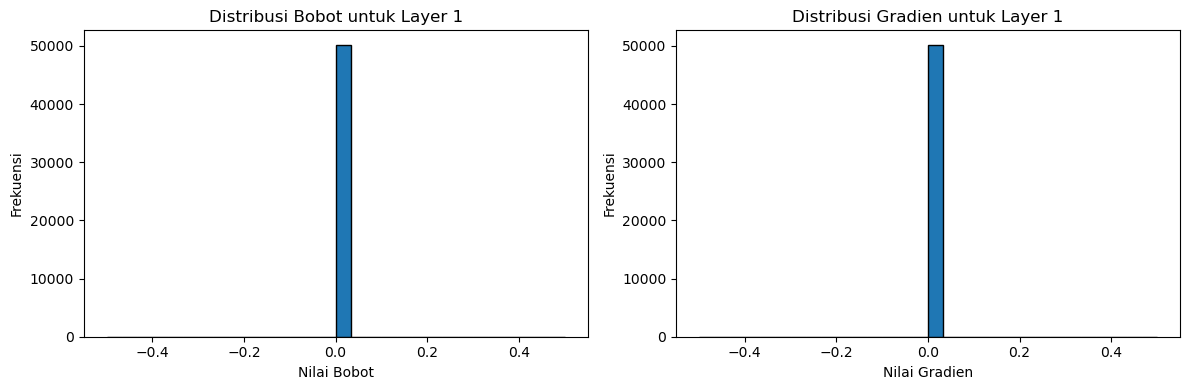

<Figure size 640x480 with 0 Axes>

Melatih model dengan inisialisasi bobot: uniform
Model dengan inisialisasi uniform memperoleh akurasi: 0.8330


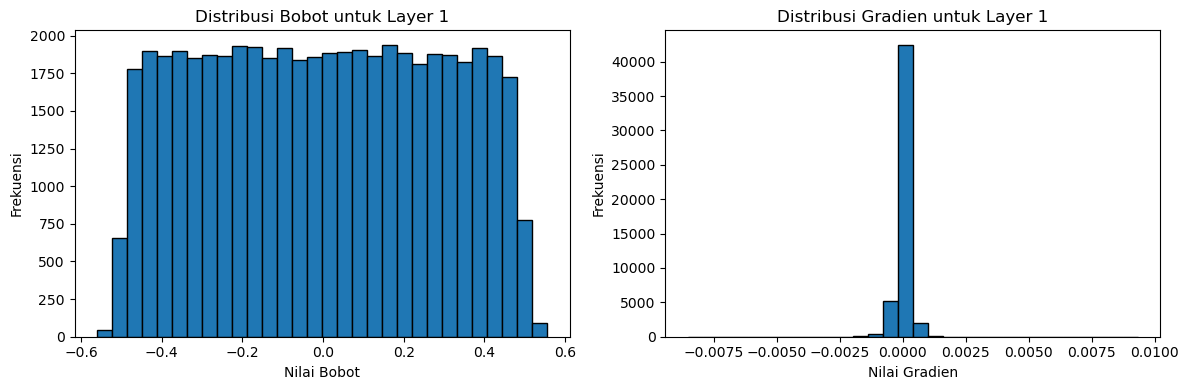

<Figure size 640x480 with 0 Axes>

Melatih model dengan inisialisasi bobot: normal
Model dengan inisialisasi normal memperoleh akurasi: 0.8266


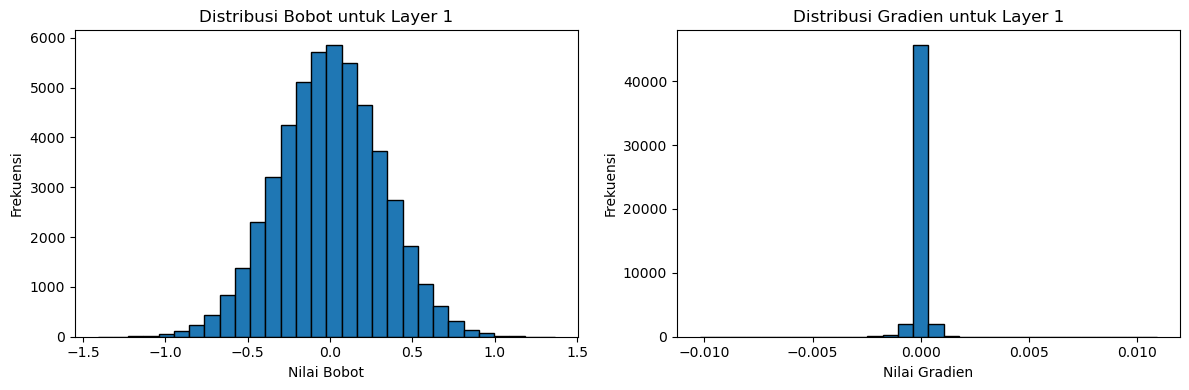

<Figure size 640x480 with 0 Axes>

Melatih model dengan inisialisasi bobot: he
Model dengan inisialisasi he memperoleh akurasi: 0.9077


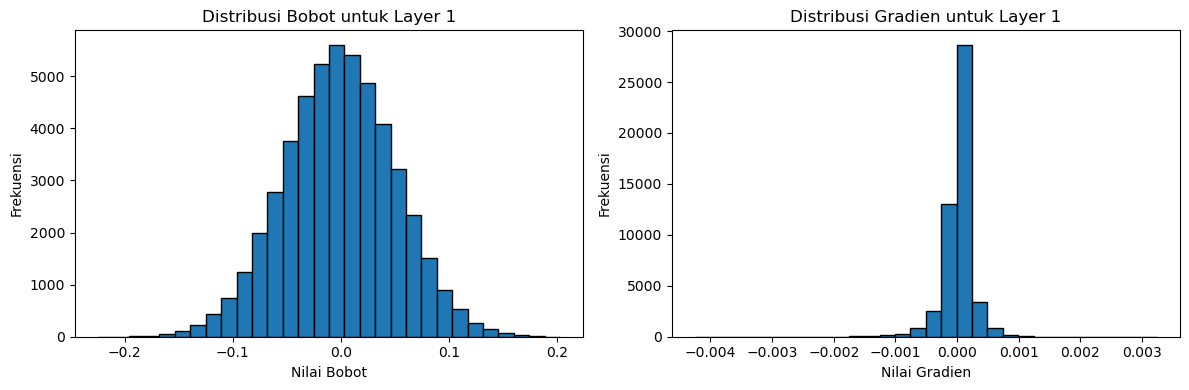

<Figure size 640x480 with 0 Axes>

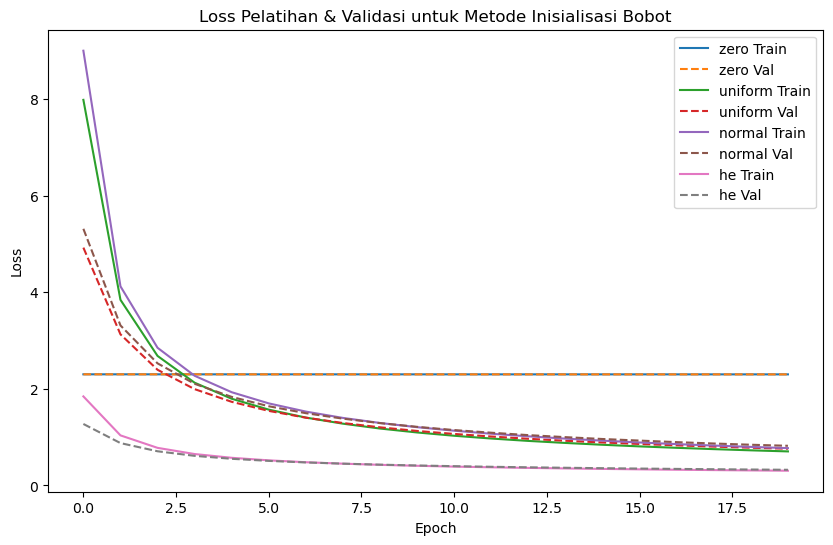

In [14]:
# Code Block 6: Uji pengaruh metode inisialisasi bobot
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import relu, softmax
from initialization import init_weights_zero, init_weights_uniform, init_weights_normal, init_weights_he
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss

init_methods = {
    'zero': init_weights_zero,
    'uniform': init_weights_uniform,
    'normal': init_weights_normal,
    'he': init_weights_he
}

input_dim = 784
hidden_dim = 64
output_dim = 10
epochs = 20
batch_size = 32
learning_rate = 0.01

results_init = {}

for name, init_func in init_methods.items():
    print(f"Melatih model dengan inisialisasi bobot: {name}")
    layers = [input_dim, hidden_dim, output_dim]
    activations = [relu, softmax]
    
    # Tentukan parameter inisialisasi sesuai metode
    if name == 'zero':
        init_params = {}
    elif name == 'uniform':
        init_params = {'lower_bound': -0.5, 'upper_bound': 0.5, 'seed': 42}
    elif name == 'normal':
        init_params = {'mean': 0.0, 'variance': 0.1, 'seed': 42}
    elif name == 'he':
        init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}
    
    model = FFNN(layers=layers,
                 activations=activations,
                 loss_func=categorical_cross_entropy_loss,
                 loss_grad=d_categorical_cross_entropy_loss,
                 init_method=init_func,
                 init_params=init_params)
    
    history = model.train(X_train, y_train, X_val, y_val, 
                          batch_size=batch_size, epochs=epochs, 
                          learning_rate=learning_rate, verbose=0)
    
    y_pred = model.forward(X_val)
    final_pred = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_val, axis=1)
    accuracy = np.mean(final_pred == true_labels)
    
    results_init[name] = {'accuracy': accuracy, 'history': history}
    print(f"Model dengan inisialisasi {name} memperoleh akurasi: {accuracy:.4f}")
    
    # Plot distribusi bobot dan gradien pada hidden layer (misal: layer 1)
    model.plot_weight_and_gradient_distribution([1])
    plt.suptitle(f"Distribusi Bobot dan Gradien ({name} Initialization)")
    plt.show()

# Plot grafik loss pelatihan & validasi untuk tiap metode inisialisasi
plt.figure(figsize=(10, 6))
for name in init_methods.keys():
    plt.plot(results_init[name]['history']['train_loss'], label=f'{name} Train')
    plt.plot(results_init[name]['history']['val_loss'], label=f'{name} Val', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Pelatihan & Validasi untuk Metode Inisialisasi Bobot')
plt.legend()
plt.show()


Perbandingan dengan Library sklearn MLPClassifier
Latih kedua model (FFNN custom dan sklearn MLP) dengan hyperparameter yang sama, kemudian bandingkan hasil prediksinya

In [15]:
# Code Block 7: Perbandingan hasil prediksi antara custom FFNN dan sklearn MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FFNN
from activation import relu, softmax
from initialization import init_weights_uniform, init_weights_he
from loss import categorical_cross_entropy_loss, d_categorical_cross_entropy_loss
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter yang digunakan sama untuk kedua model
input_dim = 784
hidden_dim = 64
output_dim = 10
epochs = 20
batch_size = 32
learning_rate = 0.1

# Model FFNN custom
layers = [input_dim, hidden_dim, output_dim]
activations = [relu, softmax]
init_params = {'lower_bound': 0, 'upper_bound': 0.5, 'seed': 42}

custom_model = FFNN(layers=layers,
                    activations=activations,
                    loss_func=categorical_cross_entropy_loss,
                    loss_grad=d_categorical_cross_entropy_loss,
                    init_method=init_weights_he,
                    init_params=init_params)

print("Melatih model FFNN custom...")
custom_model.train(X_train, y_train, X_val, y_val, 
                   batch_size=batch_size, epochs=epochs, 
                   learning_rate=learning_rate, verbose=0)
y_pred_custom = custom_model.forward(X_val)
final_pred_custom = np.argmax(y_pred_custom, axis=1)
true_labels = np.argmax(y_val, axis=1)
accuracy_custom = np.mean(final_pred_custom == true_labels)
print(f"Akurasi FFNN custom: {accuracy_custom:.4f}")

# Model sklearn MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(hidden_dim,), activation='relu',
                    solver='sgd', learning_rate_init=learning_rate, 
                    max_iter=epochs, random_state=42)
print("Melatih model sklearn MLPClassifier...")
mlp.fit(X_train, np.argmax(y_train, axis=1))
y_pred_sklearn = mlp.predict(X_val)
accuracy_sklearn = accuracy_score(true_labels, y_pred_sklearn)
print(f"Akurasi sklearn MLPClassifier: {accuracy_sklearn:.4f}")

# Bandingkan hasil prediksi (hanya menampilkan beberapa contoh)
print("Perbandingan prediksi (10 data pertama):")
print("FFNN custom  :", final_pred_custom[:10])
print("sklearn MLP  :", y_pred_sklearn[:10])


Melatih model FFNN custom...
Akurasi FFNN custom: 0.9530
Melatih model sklearn MLPClassifier...
Akurasi sklearn MLPClassifier: 0.9610
Perbandingan prediksi (10 data pertama):
FFNN custom  : [8 4 8 7 7 0 6 2 7 4]
sklearn MLP  : [8 4 8 7 7 0 6 2 7 4]


c:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
